# **THE SPARKS FOUNDATION**

## **TASK 1 - Exploratory Data Analysis (Sports)**
As a sports analysts, find out the most successful teams, players and factors
contributing win or loss of a team. Suggest teams or players a company should endorse for its products.

### *Author - Krishna Bansal*

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [80]:
data_m = pd.read_csv("C:/Users/Lenovo/Downloads/matches.csv", index_col=0)
data_d = pd.read_csv("C:/Users/Lenovo/Downloads/deliveries.csv", index_col=0)

In [102]:
data_m.head(1)

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,05-04-2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [103]:
data_d.head(1)

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [83]:
print("Number of Seasons:", data_m['season'].nunique())
print("Seasons:",data_m['season'].unique())
print("Number of matches played:", data_m.index.nunique())

Number of Seasons: 12
Seasons: [2017 2008 2009 2010 2011 2012 2013 2014 2015 2016 2018 2019]
Number of matches played: 756


In [84]:
data_m.replace(['Rising Pune Supergiant'], ['Rising Pune Supergiants'],inplace=True)
data_m.replace(['Sunrisers Hyderabad', 'Mumbai Indians' ,'Gujarat Lions'
 ,'Royal Challengers Bangalore',
 'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
 'Chennai Super Kings' ,'Rajasthan Royals' ,'Deccan Chargers',
 'Kochi Tuskers Kerala' ,'Pune Warriors', 'Rising Pune Supergiants',
 'Delhi Capitals']
                ,['SRH','MI','GL','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS', 'DCa'],inplace=True)

data_d.replace(['Sunrisers Hyderabad', 'Mumbai Indians' ,'Gujarat Lions'
 ,'Royal Challengers Bangalore',
 'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
 'Chennai Super Kings' ,'Rajasthan Royals' ,'Deccan Chargers',
 'Kochi Tuskers Kerala' ,'Pune Warriors', 'Rising Pune Supergiants',
 'Delhi Capitals']
                ,['SRH','MI','GL','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS', 'DCa'],inplace=True)

print('Number of Teams:', data_m['team1'].nunique())
print('Teams featured in the Tournament:\n',data_m['team1'].unique() )

Number of Teams: 14
Teams featured in the Tournament:
 ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW'
 'DCa']


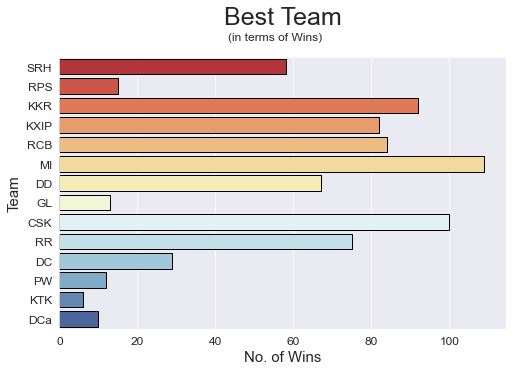

In [85]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.countplot(y=data_m['winner'], palette='RdYlBu', edgecolor='black')
plt.title('Best Team\n', size=25)
plt.suptitle('\n(in terms of Wins)')
plt.ylabel('Team', size=15)
plt.xlabel('No. of Wins', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

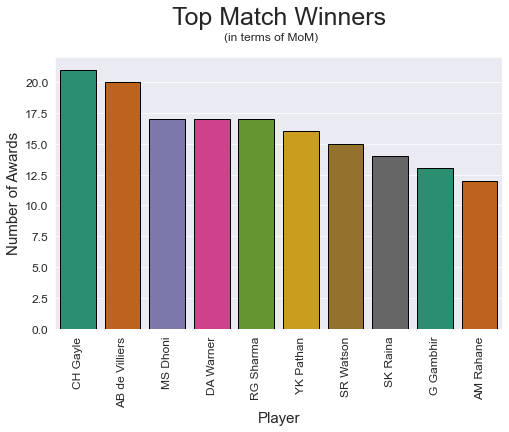

In [86]:
most_mom = data_m['player_of_match'].value_counts().head(10).reset_index()
most_mom.columns = ['Player', 'No. of Awards']

plt.figure(figsize=(8,5))
sns.barplot(x=most_mom['Player'], y=most_mom['No. of Awards'], palette='Dark2', edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Top Match Winners\n', size=25)
plt.suptitle('\n(in terms of MoM)')
plt.ylabel('Number of Awards', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

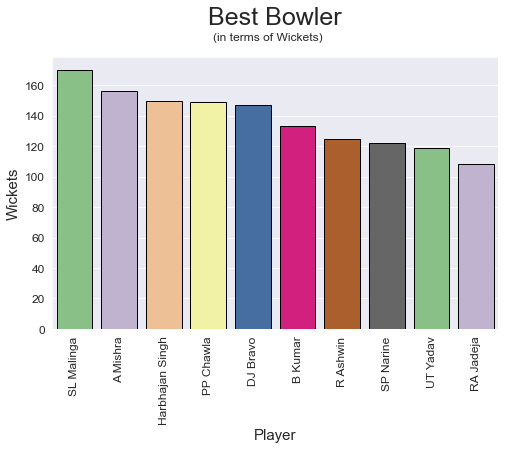

In [87]:
dismissal = ['caught','bowled','caught and bowled','hit wicket','lbw','stumped']
best_bowler = data_d.loc[data_d['dismissal_kind'].isin(dismissal)]
best_bowler = best_bowler['bowler'].value_counts().reset_index().head(10)
best_bowler.columns = ['bowler', 'wickets']

plt.figure(figsize=(8,5))
sns.barplot(x=best_bowler['bowler'], y=best_bowler['wickets'],palette='Accent', edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Best Bowler\n', size=25)
plt.suptitle('\n(in terms of Wickets)')
plt.ylabel('Wickets', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

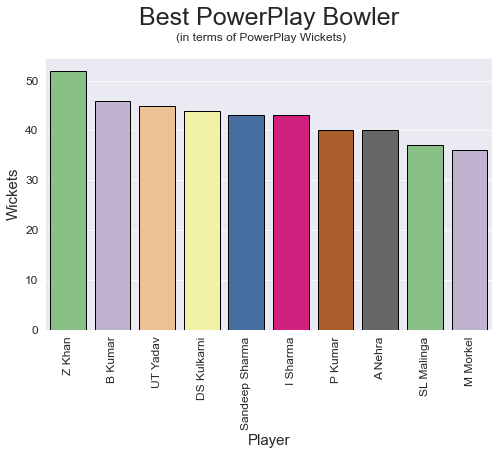

In [88]:
powerplay = [1,2,3,4,5,6]
best_bowler_pp = data_d.loc[data_d['dismissal_kind'].isin(dismissal) & data_d['over'].isin(powerplay)]
best_bowler_pp = best_bowler_pp['bowler'].value_counts().reset_index().head(10)
best_bowler_pp.columns = ['bowler', 'wickets']

plt.figure(figsize=(8,5))
sns.barplot(x=best_bowler_pp['bowler'], y=best_bowler_pp['wickets'],palette='Accent',edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Best PowerPlay Bowler\n', size=25)
plt.suptitle('\n(in terms of PowerPlay Wickets)')
plt.ylabel('Wickets', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

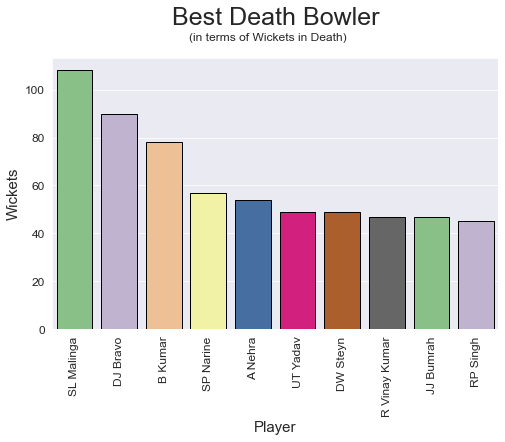

In [89]:
death = [16,17,18,19,20]
best_bowler_death = data_d.loc[data_d['dismissal_kind'].isin(dismissal) & data_d['over'].isin(death)]
best_bowler_death = best_bowler_death['bowler'].value_counts().reset_index().head(10)
best_bowler_death.columns = ['bowler', 'wickets']

plt.figure(figsize=(8,5))
sns.barplot(x=best_bowler_death['bowler'], y=best_bowler_death['wickets'],palette='Accent',edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Best Death Bowler\n', size=25)
plt.suptitle('\n(in terms of Wickets in Death)')
plt.ylabel('Wickets', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

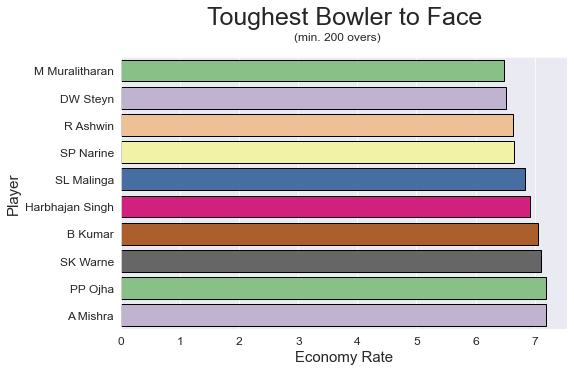

In [90]:
economy_rate=data_d.groupby(['bowler']).sum()
economy_rate['over'] = data_d['bowler'].value_counts()/6
economy_rate['runs'] = economy_rate['wide_runs'] + economy_rate['noball_runs'] + economy_rate['batsman_runs']
economy_rate = economy_rate[economy_rate['over'] >= 200]
economy_rate['rate'] = economy_rate['runs']/economy_rate['over']
economy_rate = economy_rate.sort_values(by=['rate'], ascending=True).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=economy_rate['rate'], y=economy_rate.index, palette='Accent',edgecolor='black')
plt.title('Toughest Bowler to Face\n', size=25)
plt.suptitle('\n(min. 200 overs)')
plt.ylabel('Player', size=15)
plt.xlabel('Economy Rate', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

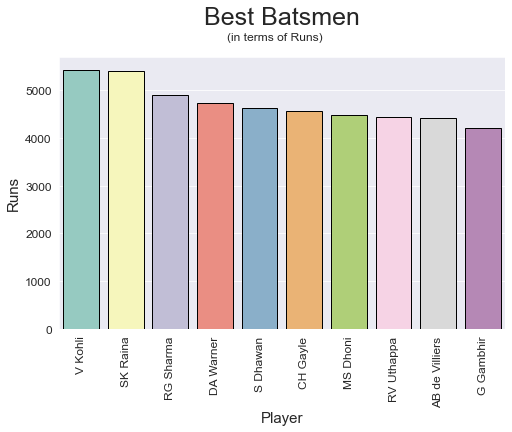

In [91]:
best_batsman = data_d.groupby(['batsman']).batsman_runs.sum().reset_index()
best_batsman = best_batsman.set_index('batsman').sort_values(by=['batsman_runs'], ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=best_batsman.index, y=best_batsman['batsman_runs'], palette='Set3',edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Best Batsmen\n', size=25)
plt.suptitle('\n(in terms of Runs)')
plt.ylabel('Runs', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

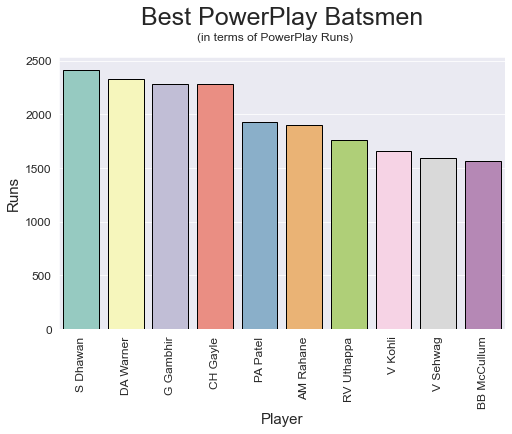

In [92]:
best_batsman_pp = data_d.loc[data_d['over'].isin(powerplay)]
best_batsman_pp = best_batsman_pp.groupby(['batsman']).batsman_runs.sum().reset_index()
best_batsman_pp = best_batsman_pp.set_index('batsman').sort_values(by=['batsman_runs'], ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=best_batsman_pp.index, y=best_batsman_pp['batsman_runs'], palette='Set3',edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Best PowerPlay Batsmen\n', size=25)
plt.suptitle('\n(in terms of PowerPlay Runs)')
plt.ylabel('Runs', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

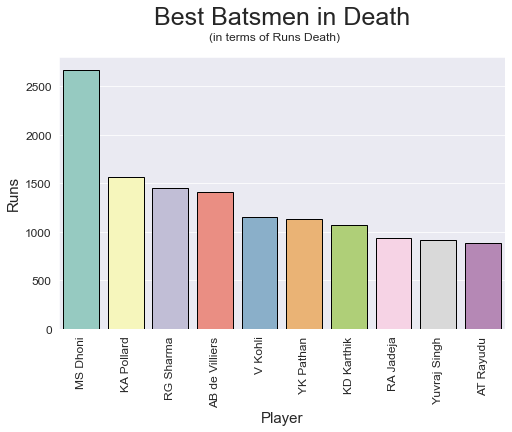

In [93]:
best_batsman_death = data_d.loc[data_d['over'].isin(death)]
best_batsman_death = best_batsman_death.groupby(['batsman']).batsman_runs.sum().reset_index()
best_batsman_death = best_batsman_death.set_index('batsman').sort_values(by=['batsman_runs'], ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=best_batsman_death.index, y=best_batsman_death['batsman_runs'], palette='Set3', edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Best Batsmen in Death\n', size=25)
plt.suptitle('\n(in terms of Runs Death)')
plt.ylabel('Runs', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

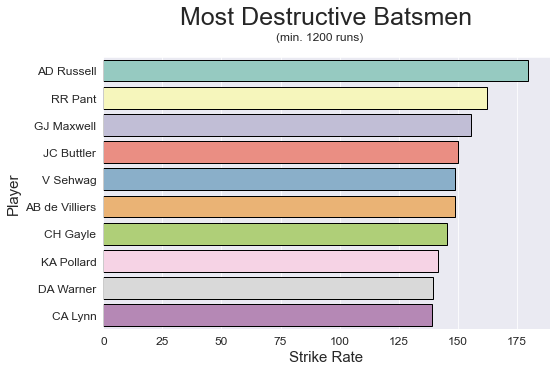

In [94]:
strike_rate = data_d.groupby(['batsman']).batsman_runs.sum().reset_index()
strike_rate['balls'] = data_d.groupby(['batsman']).ball.count().reset_index()['ball']
strike_rate['rate'] = strike_rate['batsman_runs']/strike_rate['balls']*100
strike_rate = strike_rate[strike_rate['batsman_runs'] >= 1200].sort_values(by=['rate'], ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=strike_rate['rate'], y=strike_rate['batsman'], palette='Set3', edgecolor='black')
plt.title('Most Destructive Batsmen\n', size=25)
plt.suptitle('\n(min. 1200 runs)')
plt.ylabel('Player', size=15)
plt.xlabel('Strike Rate', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

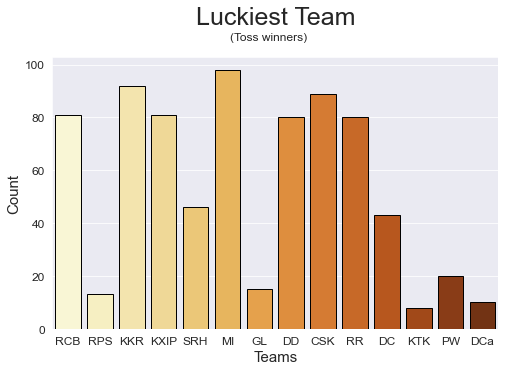

In [95]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.countplot(x=data_m['toss_winner'], palette='YlOrBr', edgecolor='black')
plt.title('Luckiest Team\n', size=25)
plt.ylabel('Count', size=15)
plt.xlabel('Teams', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.suptitle('\n(Toss winners)')
plt.show()

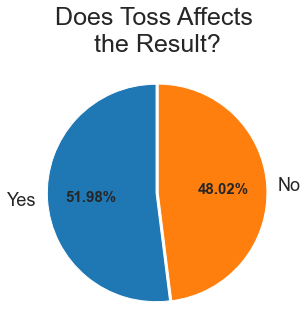

In [96]:
toss = data_m.loc[data_m['toss_winner'] == data_m['winner']]
data = [len(toss), len(data_m)-len(toss)]
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(data, labels=['Yes', 'No'], startangle=90,explode=(.01,.01) ,autopct='%1.2f%%')
plt.title('Does Toss Affects \nthe Result?',size=25)
plt.setp(texts, size=18)
plt.setp(autotexts, size=15, weight="bold")
plt.show()

**Winning the Toss does not guarantee the winner, as both Teams stand equal chance of winning the match even after the Toss.**

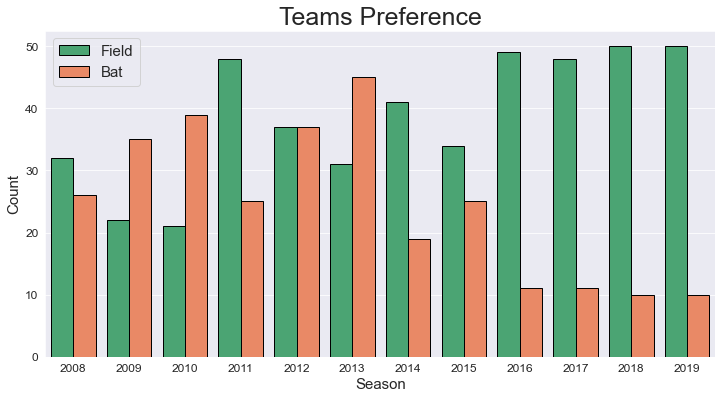

In [97]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.countplot(x=data_m['season'],hue=data_m['toss_decision'] 
              ,palette=dict(field='mediumseagreen',bat='coral'), edgecolor='black')
plt.title('Teams Preference', size=25)
plt.ylabel('Count', size=15)
plt.xlabel('Season', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.legend(('Field', 'Bat'), prop={"size" :15})
plt.show()

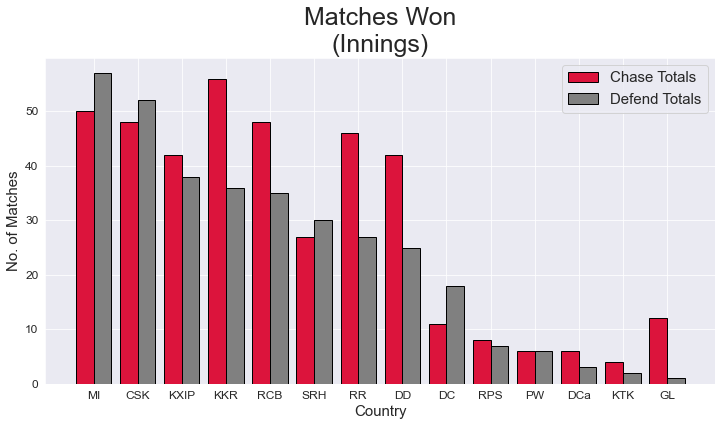

In [98]:
innings = data_m.loc[data_m['win_by_runs'] != 0]
innings = innings['winner'].value_counts().reset_index().set_index('index')
innings.columns = ['Defend Totals']
innings2 = data_m.loc[data_m['win_by_wickets'] != 0]
innings2 = innings2['winner'].value_counts().reset_index().set_index('index')
innings2.columns = ['Bat2']
innings['Chase Totals'] = innings2['Bat2']


x = np.arange(14)
fig,ax = plt.subplots(figsize=(12,6))
c1 = plt.bar(x- 0.2, innings['Chase Totals'], width=0.4, color='crimson', edgecolor='black')
c2 = plt.bar(x+0.2, innings['Defend Totals'], width=0.4, color='grey', edgecolor='black')
plt.xticks(size=12)
ax.set_xticks(x)
ax.set_xticklabels(innings.index)
plt.yticks(size=12)
plt.title('Matches Won\n(Innings)', size=25)
plt.xlabel('Country', size=15)
plt.ylabel('No. of Matches', size=15)
plt.legend((c1[0], c2[0]) ,('Chase Totals', 'Defend Totals'), prop={"size" :15}, loc=1)
plt.show()

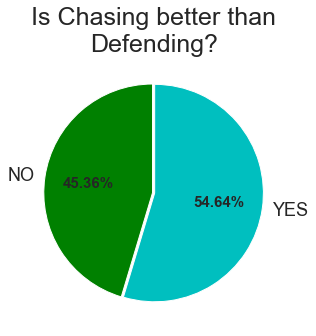

In [99]:
bat_first = data_m.loc[data_m['win_by_runs'] != 0]
bat_second = data_m.loc[data_m['win_by_wickets'] != 0]

data = [len(bat_first), len(bat_second)]
ilabels=['NO', 'YES']
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(data, labels= ilabels, startangle=90,explode=(.01,.01) ,autopct='%1.2f%%',
                                  colors=['g','c'])
plt.title('Is Chasing better than\nDefending?',size=25)
plt.setp(texts, size=18)
plt.setp(autotexts, size=15, weight="bold")
plt.show()

**Although Teams for the Last 4-5 years prefer to Chase, but there is no clear advantage to the the chasing team in terms of winning the Match as the probablity of them winning is only slightly higher than the other team.**

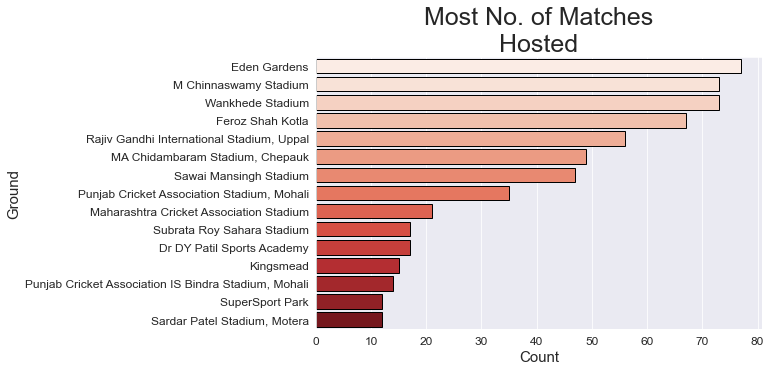

In [100]:
venue = data_m['venue'].value_counts().reset_index().head(15)
venue.columns = ['ground', 'Matches']

plt.figure(figsize=(8,5))
sns.barplot(x=venue['Matches'],y=venue['ground'],palette='Reds' ,edgecolor='black')
plt.title('Most No. of Matches\nHosted', size=25)
plt.ylabel('Ground', size=15)
plt.xlabel('Count', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

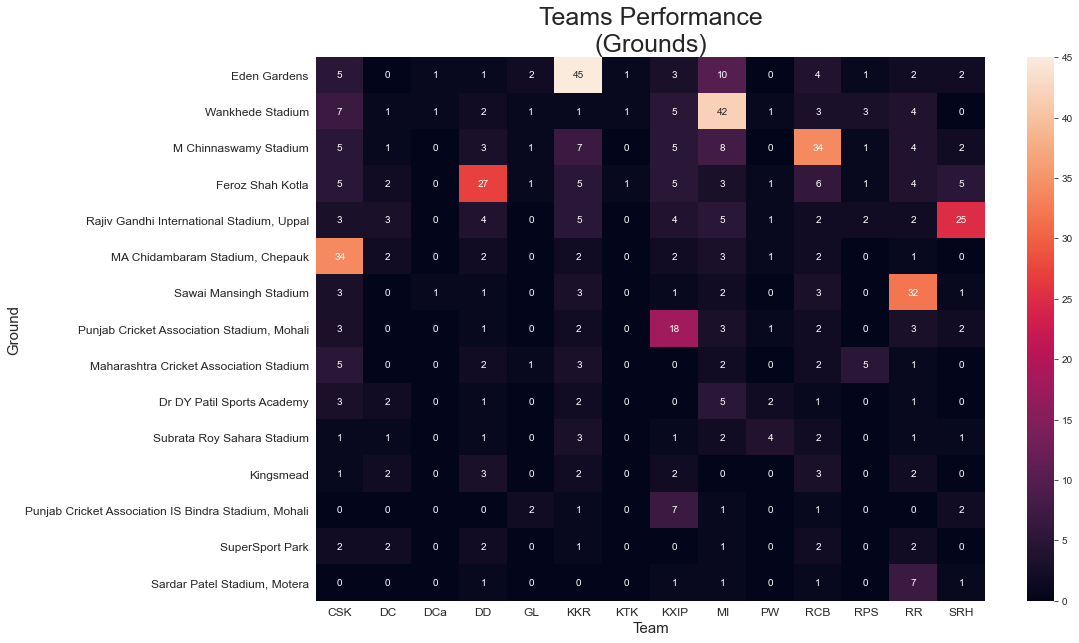

In [101]:
venue = data_m.groupby(['venue','winner']).count()
venue = venue.iloc[:-1,:1].reset_index()
venue = venue.rename(columns={'season':'wins'})
venue = venue.pivot('venue','winner','wins')
venue.fillna(0,inplace=True)
venue['total'] = venue.sum(axis=1,skipna=False)
venue = venue.sort_values(by=['total'], ascending=False).head(15)
venue.drop(['total'], axis=1, inplace=True)

sns.set_style('dark')
plt.figure(figsize=(15,10))
sns.heatmap(data=venue, annot=True, cmap='rocket')
plt.xlabel('Team', size=15)
plt.ylabel('Ground', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.title('Teams Performance\n(Grounds)', size=25)
plt.show()

**Most of the Teams such as MI, KKR and CSK are very strong at their home ground, whereas there is no Team who is dominant at away grounds. So, Home advantage is very crucial for Most of the Teams.**

## A Company looking for a Player to endorse its products should definitely try to Sign the likes of:
**CH Gayle, V. Kohli, L. Malinga, D. Warner, AB de Villiers, MS Dhoni, DJ Bravo, B.Kumar and AD Russell**
These Players are match winners and have the most impact on the game according to the analysis, and the qualities they possess will be very much aligned with qualities of product and brand-value of the company.

**Also the Company should try to Sign Players from MI, CSK or KKR.**
As these are the most successful Teams in the League and they will have the most fan-following among the other teams.